## Atividade 2
### Nome: Letícia Saraiva Chaves, 402120

FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score


In [2]:
trainData = pd.read_csv('fashionmnist/fashion-mnist_train.csv')

In [3]:
trainData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Os dados de treino têm 60000 linhas, como observado abaixo.

In [4]:
trainData.shape

(60000, 785)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

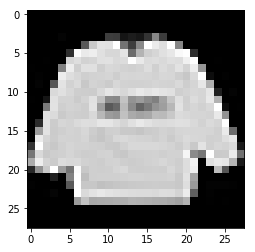

In [6]:
# Imprimindo um objeto do dataset
plt.imshow(trainData.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

In [68]:
#Separando as labels de treino
#Carregando os dados de teste e separando as labels de teste

trainLabels = trainData['label']
testData = pd.read_csv('fashionmnist/fashion-mnist_test.csv')
testLabels = testData['label']

In [8]:
kVals = range(1, 10, 2)
accuracies = []

In [10]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(trainData, trainLabels)
        # evaluate the model and update the accuracies list
        score = model.score(testData, testLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=85.67%
k=3, accuracy=85.84%
k=5, accuracy=85.89%
k=7, accuracy=85.58%
k=9, accuracy=85.61%


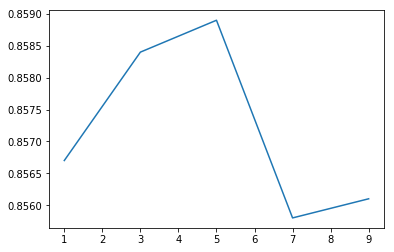

In [14]:
%matplotlib inline

plt.plot(kVals, accuracies)
plt.show()

In [11]:
model = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
model.fit(trainData, trainLabels)

y_ = model.predict(testData)


In [12]:
confusion_matrix(testLabels, y_)

array([[874,   1,  16,  11,   5,   0,  86,   2,   5,   0],
       [  4, 965,   7,  14,   1,   0,   9,   0,   0,   0],
       [ 18,   0, 808,  14,  98,   0,  61,   0,   1,   0],
       [ 36,  11,  14, 882,  32,   0,  25,   0,   0,   0],
       [  4,   0,  99,  26, 799,   0,  70,   0,   2,   0],
       [  1,   0,   1,   1,   0, 816,   8,  98,   4,  71],
       [202,   1, 114,  16,  74,   0, 583,   0,  10,   0],
       [  0,   0,   0,   0,   0,   1,   0, 945,   0,  54],
       [  2,   1,  14,   2,   6,   1,  13,   5, 953,   3],
       [  0,   0,   0,   0,   0,   2,   0,  34,   0, 964]])

In [20]:
print("Accuracy: ", accuracy_score(testLabels, y_))
print("Precision:", precision_score(testLabels, y_, average='weighted'))

Accuracy:  0.8589
Precision: 0.8613943216647831


In [57]:
#Dicionário com os rótulos
dic = {0:"Camiseta / top", 1:"calça", 2:"Pulôver", 3:"Vestido", 4:"Casaco", 5:"Sandália", 6:"Camisa", 7:"Sapatilha", 8:"Bag", 9:"Bota no tornozelo"}

Camiseta / top


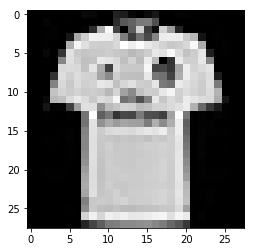

In [69]:
#Printando a imagem e seu rótulo

plt.imshow(testData.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
print(dic[testData.values[0][0]])
plt.show()

Vestido


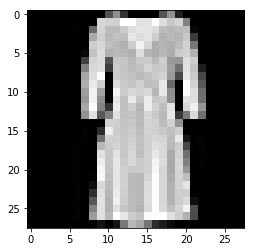

In [51]:
plt.imshow(testData.values[10][1:].reshape(28,28), cmap='gray', interpolation='none')
print(dic[testData.values[10][0]])
plt.show()

Bota no tornozelo


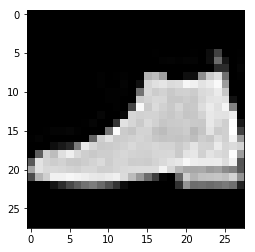

In [54]:
plt.imshow(testData.values[100][1:].reshape(28,28), cmap='gray', interpolation='none')
print(dic[testData.values[100][0]])
plt.show()


Sandália


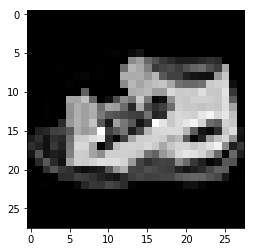

In [55]:
plt.imshow(testData.values[300][1:].reshape(28,28), cmap='gray', interpolation='none')
print(dic[testData.values[300][0]])
plt.show()

Podemos ver que existem 10000 linhas nos dados de teste.

In [61]:
testData.shape

(10000, 785)

E para cada rótulo temos 1000 imagens classificadas. Como podemos ver logo em seguida.

[0 1 2 3 4 5 6 7 8 9] [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


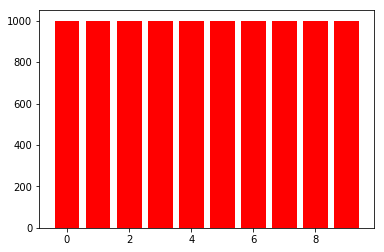

In [65]:
names, qtds = np.unique(testData.iloc[:,0],return_counts=True)
print(names, qtds)
plt.bar(names, qtds, color='r')
plt.show();